# Car_Prize_Prediction  Model

### Importing Libraries

In [73]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt

### Importing dataset

In [74]:
df=pd.read_csv('https://raw.githubusercontent.com/amankharwal/Website-data/master/CarPrice.csv')

In [75]:
df.sample(5)

,car_ID,symboling,CarName,fueltype,aspiration,doornumber,carbody,drivewheel,enginelocation,wheelbase,...,enginesize,fuelsystem,boreratio,stroke,compressionratio,horsepower,peakrpm,citympg,highwaympg,price
32,33,1,honda civic,gas,std,two,hatchback,fwd,front,93.7,...,79,1bbl,2.91,3.07,10.1,60,5500,38,42,5399.0
69,70,0,buick century,diesel,turbo,two,hardtop,rwd,front,106.7,...,183,idi,3.58,3.64,21.5,123,4350,22,25,28176.0
66,67,0,mazda rx-7 gs,diesel,std,four,sedan,rwd,front,104.9,...,134,idi,3.43,3.64,22.0,72,4200,31,39,18344.0
18,19,2,chevrolet impala,gas,std,two,hatchback,fwd,front,88.4,...,61,2bbl,2.91,3.03,9.5,48,5100,47,53,5151.0
186,187,2,volkswagen 411 (sw),gas,std,four,sedan,fwd,front,97.3,...,109,mpfi,3.19,3.40,9.0,85,5250,27,34,8495.0


### EDA

In [76]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 205 entries, 0 to 204
Data columns (total 26 columns):
 #   Column            Non-Null Count  Dtype  
---  ------            --------------  -----  
 0   car_ID            205 non-null    int64  
 1   symboling         205 non-null    int64  
 2   CarName           205 non-null    object 
 3   fueltype          205 non-null    object 
 4   aspiration        205 non-null    object 
 5   doornumber        205 non-null    object 
 6   carbody           205 non-null    object 
 7   drivewheel        205 non-null    object 
 8   enginelocation    205 non-null    object 
 9   wheelbase         205 non-null    float64
 10  carlength         205 non-null    float64
 11  carwidth          205 non-null    float64
 12  carheight         205 non-null    float64
 13  curbweight        205 non-null    int64  
 14  enginetype        205 non-null    object 
 15  cylindernumber    205 non-null    object 
 16  enginesize        205 non-null    int64  
 1

In [77]:
df.describe()

,car_ID,symboling,wheelbase,carlength,carwidth,carheight,curbweight,enginesize,boreratio,stroke,compressionratio,horsepower,peakrpm,citympg,highwaympg,price
count,205.000000,205.000000,205.000000,205.000000,205.000000,205.000000,205.000000,205.000000,205.000000,205.000000,205.000000,205.000000,205.000000,205.000000,205.000000,205.000000
mean,103.000000,0.834146,98.756585,174.049268,65.907805,53.724878,2555.565854,126.907317,3.329756,3.255415,10.142537,104.117073,5125.121951,25.219512,30.751220,13276.710571
std,59.322565,1.245307,6.021776,12.337289,2.145204,2.443522,520.680204,41.642693,0.270844,0.313597,3.972040,39.544167,476.985643,6.542142,6.886443,7988.852332
min,1.000000,-2.000000,86.600000,141.100000,60.300000,47.800000,1488.000000,61.000000,2.540000,2.070000,7.000000,48.000000,4150.000000,13.000000,16.000000,5118.000000
25%,52.000000,0.000000,94.500000,166.300000,64.100000,52.000000,2145.000000,97.000000,3.150000,3.110000,8.600000,70.000000,4800.000000,19.000000,25.000000,7788.000000
50%,103.000000,1.000000,97.000000,173.200000,65.500000,54.100000,2414.000000,120.000000,3.310000,3.290000,9.000000,95.000000,5200.000000,24.000000,30.000000,10295.000000
75%,154.000000,2.000000,102.400000,183.100000,66.900000,55.500000,2935.000000,141.000000,3.580000,3.410000,9.400000,116.000000,5500.000000,30.000000,34.000000,16503.000000
max,205.000000,3.000000,120.900000,208.100000,72.300000,59.800000,4066.000000,326.000000,3.940000,4.170000,23.000000,288.000000,6600.000000,49.000000,54.000000,45400.000000


In [78]:
df.shape

(205, 26)

In [79]:
df.columns

Index(['car_ID', 'symboling', 'CarName', 'fueltype', 'aspiration',
       'doornumber', 'carbody', 'drivewheel', 'enginelocation', 'wheelbase',
       'carlength', 'carwidth', 'carheight', 'curbweight', 'enginetype',
       'cylindernumber', 'enginesize', 'fuelsystem', 'boreratio', 'stroke',
       'compressionratio', 'horsepower', 'peakrpm', 'citympg', 'highwaympg',
       'price'],
      dtype='object')

In [80]:
df['fueltype'].value_counts()

gas       185
diesel     20
Name: fueltype, dtype: int64

In [81]:
df['aspiration'].value_counts()

std      168
turbo     37
Name: aspiration, dtype: int64

In [82]:
df['doornumber'].value_counts()

four    115
two      90
Name: doornumber, dtype: int64

In [83]:
df['carbody'].value_counts()

sedan          96
hatchback      70
wagon          25
hardtop         8
convertible     6
Name: carbody, dtype: int64

In [84]:
df.isnull().sum()

car_ID              0
symboling           0
CarName             0
fueltype            0
aspiration          0
doornumber          0
carbody             0
drivewheel          0
enginelocation      0
wheelbase           0
carlength           0
carwidth            0
carheight           0
curbweight          0
enginetype          0
cylindernumber      0
enginesize          0
fuelsystem          0
boreratio           0
stroke              0
compressionratio    0
horsepower          0
peakrpm             0
citympg             0
highwaympg          0
price               0
dtype: int64

In [85]:
df['compressionratio'] = df['compressionratio'].astype(int)


In [86]:
df.head()

,car_ID,symboling,CarName,fueltype,aspiration,doornumber,carbody,drivewheel,enginelocation,wheelbase,...,enginesize,fuelsystem,boreratio,stroke,compressionratio,horsepower,peakrpm,citympg,highwaympg,price
0,1,3,alfa-romero giulia,gas,std,two,convertible,rwd,front,88.6,...,130,mpfi,3.47,2.68,9,111,5000,21,27,13495.0
1,2,3,alfa-romero stelvio,gas,std,two,convertible,rwd,front,88.6,...,130,mpfi,3.47,2.68,9,111,5000,21,27,16500.0
2,3,1,alfa-romero Quadrifoglio,gas,std,two,hatchback,rwd,front,94.5,...,152,mpfi,2.68,3.47,9,154,5000,19,26,16500.0
3,4,2,audi 100 ls,gas,std,four,sedan,fwd,front,99.8,...,109,mpfi,3.19,3.40,10,102,5500,24,30,13950.0
4,5,2,audi 100ls,gas,std,four,sedan,4wd,front,99.4,...,136,mpfi,3.19,3.40,8,115,5500,18,22,17450.0


In [87]:
#To plot pair plot finding the numerical columns of dataset
df_numeric = df.select_dtypes(include=['float', 'int'])
df_numeric.head()

,car_ID,symboling,wheelbase,carlength,carwidth,carheight,curbweight,enginesize,boreratio,stroke,compressionratio,horsepower,peakrpm,citympg,highwaympg,price
0,1,3,88.6,168.8,64.1,48.8,2548,130,3.47,2.68,9,111,5000,21,27,13495.0
1,2,3,88.6,168.8,64.1,48.8,2548,130,3.47,2.68,9,111,5000,21,27,16500.0
2,3,1,94.5,171.2,65.5,52.4,2823,152,2.68,3.47,9,154,5000,19,26,16500.0
3,4,2,99.8,176.6,66.2,54.3,2337,109,3.19,3.40,10,102,5500,24,30,13950.0
4,5,2,99.4,176.6,66.4,54.3,2824,136,3.19,3.40,8,115,5500,18,22,17450.0


In [88]:
#Droping Car id and symboling because they are categorical
df_numeric = df_numeric.drop(['symboling','car_ID'], axis=1)
df_numeric.head()

,wheelbase,carlength,carwidth,carheight,curbweight,enginesize,boreratio,stroke,compressionratio,horsepower,peakrpm,citympg,highwaympg,price
0,88.6,168.8,64.1,48.8,2548,130,3.47,2.68,9,111,5000,21,27,13495.0
1,88.6,168.8,64.1,48.8,2548,130,3.47,2.68,9,111,5000,21,27,16500.0
2,94.5,171.2,65.5,52.4,2823,152,2.68,3.47,9,154,5000,19,26,16500.0
3,99.8,176.6,66.2,54.3,2337,109,3.19,3.40,10,102,5500,24,30,13950.0
4,99.4,176.6,66.4,54.3,2824,136,3.19,3.40,8,115,5500,18,22,17450.0


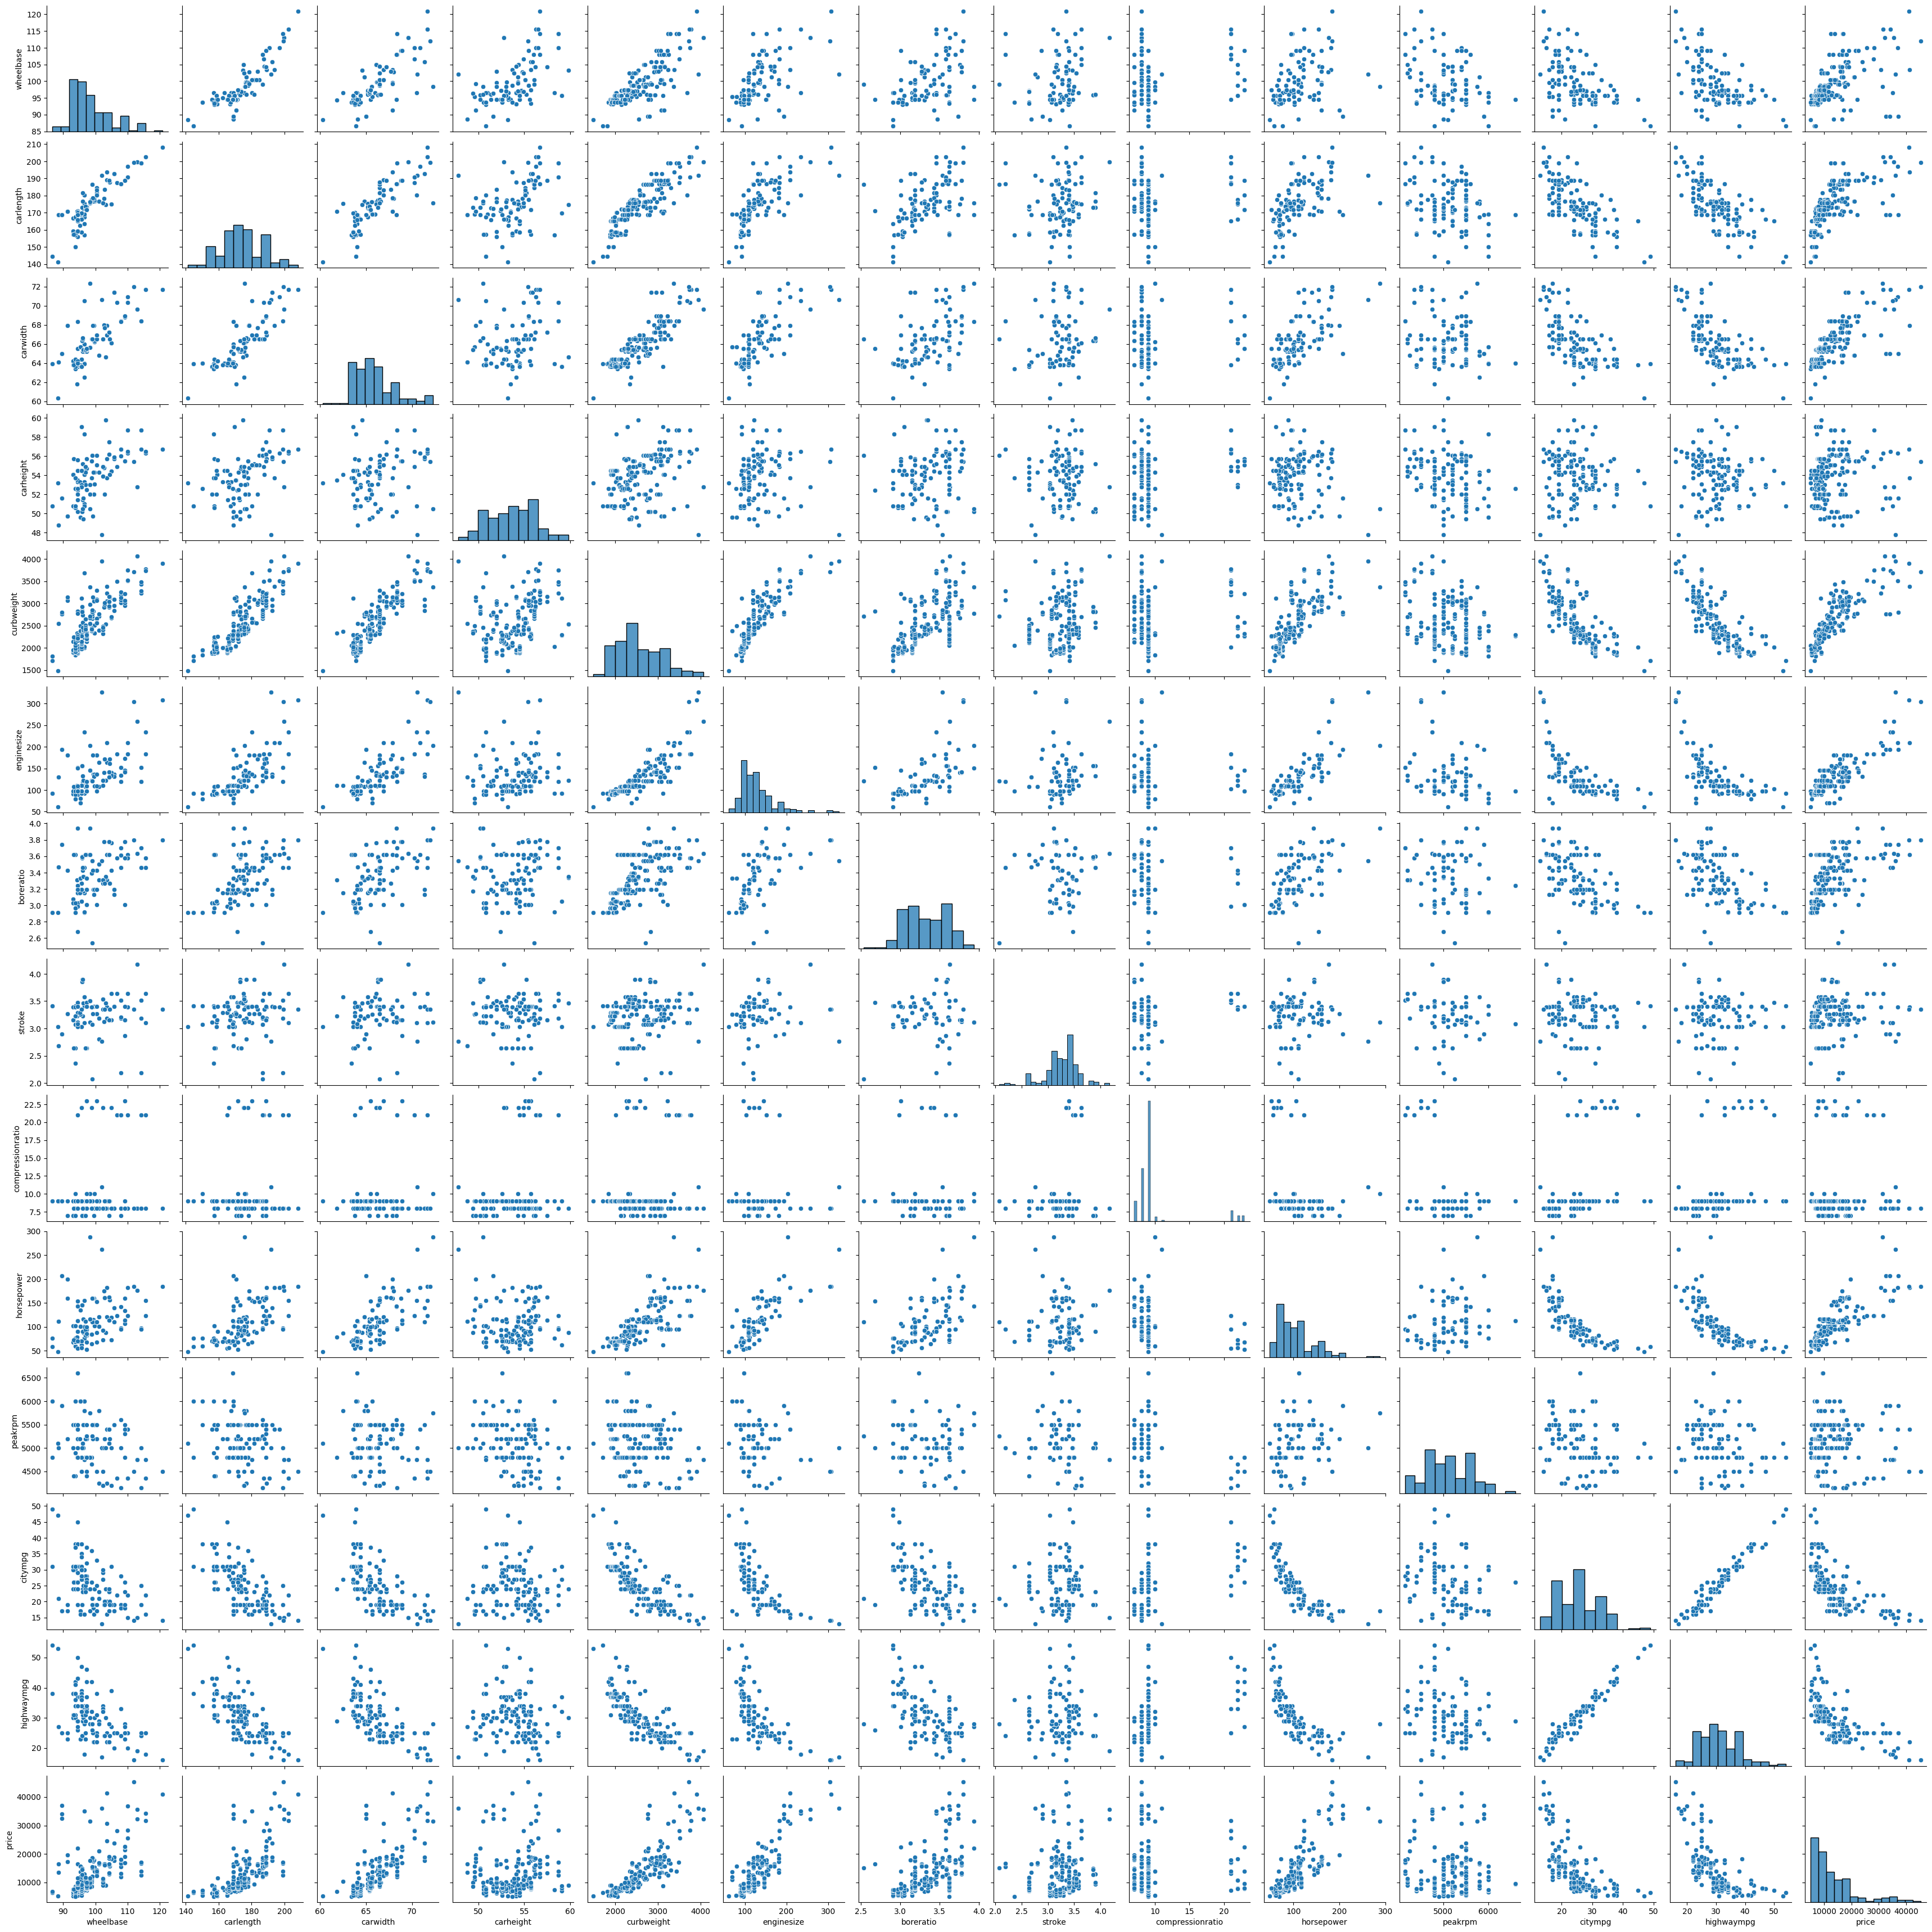

In [89]:
sns.pairplot(df_numeric)

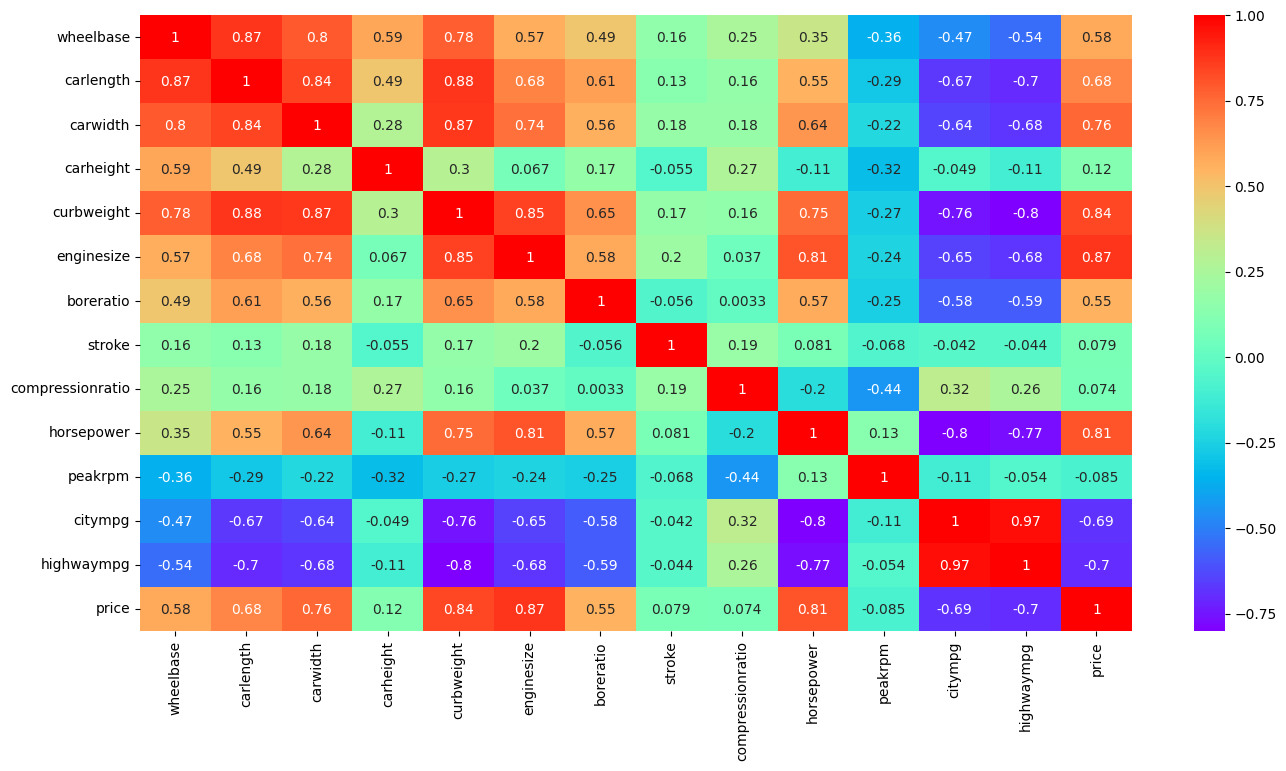

In [90]:
cor = df_numeric.corr()
plt.figure(figsize=(16,8))

# heatmap
sns.heatmap(cor, cmap="rainbow", annot=True)
plt.show()

**Insights**:
* There is a positive correlation between the price of a car and variables like wheelbase, car length, car width, curb weight, engine size, bore ratio, stroke, and horsepower. Generally, larger and more powerful cars tend to have higher prices.

* There is a negative correlation between the price of a car and variables like city mpg and highway mpg. This suggests that cars with higher fuel efficiency (higher mileage) are often priced lower, as they are typically considered more economical or budget-friendly options.


Correlation among independent variables:

Many independent variables are highly correlated (look at the top-left part of matrix): wheelbase, carlength, curbweight, enginesize etc. are all measures of 'size/weight', and are positively correlated
Thus, while building the model, we'll have to pay attention to multicollinearity (especially linear models, such as linear and logistic regression, suffer more from multicollinearity).

### Data Cleaning

In [91]:
carname=df['CarName'].apply(lambda x:x.split(" ")[0])

In [92]:
carname

0      alfa-romero
1      alfa-romero
2      alfa-romero
3             audi
4             audi
          ...     
200          volvo
201          volvo
202          volvo
203          volvo
204          volvo
Name: CarName, Length: 205, dtype: object

In [93]:
import re

# regex: any alphanumeric sequence before a space, may contain a hyphen
p = re.compile(r'\w+-?\w+')
carnames = df['CarName'].apply(lambda x: re.findall(p, x)[0])
print(carnames)

0      alfa-romero
1      alfa-romero
2      alfa-romero
3             audi
4             audi
          ...     
200          volvo
201          volvo
202          volvo
203          volvo
204          volvo
Name: CarName, Length: 205, dtype: object


In [94]:
#Creating a column called Car_Company
df['car_company'] = df['CarName'].apply(lambda x: re.findall(p, x)[0])
# look at all values
df['car_company'].astype('category').value_counts()

toyota         31
nissan         17
mazda          15
honda          13
mitsubishi     13
subaru         12
peugeot        11
volvo          11
dodge           9
volkswagen      9
buick           8
bmw             8
plymouth        7
audi            7
saab            6
isuzu           4
porsche         4
chevrolet       3
jaguar          3
alfa-romero     3
vw              2
renault         2
maxda           2
porcshce        1
toyouta         1
vokswagen       1
mercury         1
Nissan          1
Name: car_company, dtype: int64

In [95]:
df['car_company'].value_counts()

toyota         31
nissan         17
mazda          15
honda          13
mitsubishi     13
subaru         12
peugeot        11
volvo          11
volkswagen      9
dodge           9
buick           8
bmw             8
audi            7
plymouth        7
saab            6
isuzu           4
porsche         4
alfa-romero     3
chevrolet       3
jaguar          3
vw              2
maxda           2
renault         2
toyouta         1
vokswagen       1
Nissan          1
mercury         1
porcshce        1
Name: car_company, dtype: int64

In [96]:
#The syntax df.loc[<condition>, 'car_company'] selects rows where the condition is True and the column 'car_company'.
df.loc[(df['car_company'] == "vw") | (df['car_company'] == "vokswagen"), 'car_company'] = 'volkswagen'

In [97]:
#Similarly
#'porsche'
df.loc[(df['car_company']=='porcshce '),'car_company']='porsche'

#toyota
df.loc[(df['car_company']=='toyouta'),'car_company']='toyota'

#Nissan
df.loc[(df['car_company'])=='nissan','car_company']='Nissan'

# mazda
df.loc[df['car_company'] == "maxda", 'car_company'] = 'mazda'

In [98]:
df['car_company'].value_counts()

toyota         32
Nissan         18
mazda          17
mitsubishi     13
honda          13
volkswagen     12
subaru         12
peugeot        11
volvo          11
dodge           9
buick           8
bmw             8
audi            7
plymouth        7
saab            6
isuzu           4
porsche         4
jaguar          3
chevrolet       3
alfa-romero     3
renault         2
mercury         1
porcshce        1
Name: car_company, dtype: int64

In [99]:
df['car_company'].astype('category').value_counts()

toyota         32
Nissan         18
mazda          17
mitsubishi     13
honda          13
volkswagen     12
subaru         12
peugeot        11
volvo          11
dodge           9
buick           8
bmw             8
plymouth        7
audi            7
saab            6
isuzu           4
porsche         4
jaguar          3
alfa-romero     3
chevrolet       3
renault         2
porcshce        1
mercury         1
Name: car_company, dtype: int64

In [100]:
cars = df.drop('CarName', axis=1)
cars.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 205 entries, 0 to 204
Data columns (total 26 columns):
 #   Column            Non-Null Count  Dtype  
---  ------            --------------  -----  
 0   car_ID            205 non-null    int64  
 1   symboling         205 non-null    int64  
 2   fueltype          205 non-null    object 
 3   aspiration        205 non-null    object 
 4   doornumber        205 non-null    object 
 5   carbody           205 non-null    object 
 6   drivewheel        205 non-null    object 
 7   enginelocation    205 non-null    object 
 8   wheelbase         205 non-null    float64
 9   carlength         205 non-null    float64
 10  carwidth          205 non-null    float64
 11  carheight         205 non-null    float64
 12  curbweight        205 non-null    int64  
 13  enginetype        205 non-null    object 
 14  cylindernumber    205 non-null    object 
 15  enginesize        205 non-null    int64  
 16  fuelsystem        205 non-null    object 
 1

In [101]:
cars.columns

Index(['car_ID', 'symboling', 'fueltype', 'aspiration', 'doornumber',
       'carbody', 'drivewheel', 'enginelocation', 'wheelbase', 'carlength',
       'carwidth', 'carheight', 'curbweight', 'enginetype', 'cylindernumber',
       'enginesize', 'fuelsystem', 'boreratio', 'stroke', 'compressionratio',
       'horsepower', 'peakrpm', 'citympg', 'highwaympg', 'price',
       'car_company'],
      dtype='object')

### Data Preprocessing

In [102]:
# split into X and y
X = cars.loc[:, ['symboling', 'fueltype', 'aspiration', 'doornumber',
       'carbody', 'drivewheel', 'enginelocation', 'wheelbase', 'carlength',
       'carwidth', 'carheight', 'curbweight', 'enginetype', 'cylindernumber',
       'enginesize', 'fuelsystem', 'boreratio', 'stroke', 'compressionratio',
       'horsepower', 'peakrpm', 'citympg', 'highwaympg',
       'car_company']]

y = cars['price']

In [103]:
categorical = X.select_dtypes(include=['object'])
categorical.head()

,fueltype,aspiration,doornumber,carbody,drivewheel,enginelocation,enginetype,cylindernumber,fuelsystem,car_company
0,gas,std,two,convertible,rwd,front,dohc,four,mpfi,alfa-romero
1,gas,std,two,convertible,rwd,front,dohc,four,mpfi,alfa-romero
2,gas,std,two,hatchback,rwd,front,ohcv,six,mpfi,alfa-romero
3,gas,std,four,sedan,fwd,front,ohc,four,mpfi,audi
4,gas,std,four,sedan,4wd,front,ohc,five,mpfi,audi


In [104]:
dummies=pd.get_dummies(categorical)

In [105]:
dummies.head()

,fueltype_diesel,fueltype_gas,aspiration_std,aspiration_turbo,doornumber_four,doornumber_two,carbody_convertible,carbody_hardtop,carbody_hatchback,carbody_sedan,...,car_company_peugeot,car_company_plymouth,car_company_porcshce,car_company_porsche,car_company_renault,car_company_saab,car_company_subaru,car_company_toyota,car_company_volkswagen,car_company_volvo
0,0,1,1,0,0,1,1,0,0,0,...,0,0,0,0,0,0,0,0,0,0
1,0,1,1,0,0,1,1,0,0,0,...,0,0,0,0,0,0,0,0,0,0
2,0,1,1,0,0,1,0,0,1,0,...,0,0,0,0,0,0,0,0,0,0
3,0,1,1,0,1,0,0,0,0,1,...,0,0,0,0,0,0,0,0,0,0
4,0,1,1,0,1,0,0,0,0,1,...,0,0,0,0,0,0,0,0,0,0


In [106]:
# drop categorical variables
X = X.drop(list(categorical.columns), axis=1)
# concat dummy variables with X
X = pd.concat([X, dummies], axis=1)

In [107]:
#Splitting the data into train test
from sklearn.model_selection import train_test_split
X_train,X_test,Y_train,Y_test=train_test_split(X,y,test_size=0.7, train_size=0.3,random_state=100)

In [108]:
#Standardization
from sklearn.preprocessing import StandardScaler
scalar=StandardScaler()
#Train data
X_train[['wheelbase', 'carlength', 'carwidth', 'carheight', 'curbweight','enginesize', 'boreratio', 'stroke',
         'compressionratio', 'horsepower','peakrpm', 'citympg', 'highwaympg']]=scalar.fit_transform(X_train[['wheelbase', 'carlength', 'carwidth', 'carheight',
        'curbweight','enginesize', 'boreratio', 'stroke', 'compressionratio', 'horsepower','peakrpm', 'citympg', 'highwaympg']])
X_train.head()

,symboling,wheelbase,carlength,carwidth,carheight,curbweight,enginesize,boreratio,stroke,compressionratio,...,car_company_peugeot,car_company_plymouth,car_company_porcshce,car_company_porsche,car_company_renault,car_company_saab,car_company_subaru,car_company_toyota,car_company_volkswagen,car_company_volvo
171,2,-0.141622,0.048361,-0.298473,-0.683662,0.111947,0.305669,1.188692,0.747010,-0.254260,...,0,0,0,0,0,0,0,1,0,0
68,-1,1.749161,1.192556,1.691580,2.013371,1.933882,1.102316,1.027289,1.169771,2.565717,...,0,0,0,0,0,0,0,0,0,0
193,0,0.184375,0.585432,0.251967,0.564219,-0.153606,-0.490977,-0.546388,0.445038,-0.254260,...,0,0,0,0,0,0,0,0,1,0
152,1,-0.581718,-1.313777,-1.145304,0.322694,-1.117332,-0.857004,-1.111298,-0.672260,-0.254260,...,0,0,0,0,0,0,0,1,0,0
30,2,-2.065004,-2.411271,-1.018280,-1.166712,-1.648437,-0.857004,-1.676208,0.475235,-0.254260,...,0,0,0,0,0,0,0,0,0,0


In [109]:
#Test data
X_test[['wheelbase', 'carlength', 'carwidth', 'carheight', 'curbweight',
       'enginesize', 'boreratio', 'stroke', 'compressionratio', 'horsepower',
       'peakrpm', 'citympg', 'highwaympg']]=scalar.transform(X_test[['wheelbase', 'carlength', 'carwidth', 'carheight', 'curbweight',
       'enginesize', 'boreratio', 'stroke', 'compressionratio', 'horsepower',
       'peakrpm', 'citympg', 'highwaympg']])
X_test.head()

,symboling,wheelbase,carlength,carwidth,carheight,curbweight,enginesize,boreratio,stroke,compressionratio,...,car_company_peugeot,car_company_plymouth,car_company_porcshce,car_company_porsche,car_company_renault,car_company_saab,car_company_subaru,car_company_toyota,car_company_volkswagen,car_company_volvo
160,0,-0.581718,-0.722220,-0.806572,-0.281120,-0.978401,-0.727818,-0.546388,-0.672260,-0.254260,...,0,0,0,0,0,0,0,1,0,0
186,2,-0.320920,-0.301903,-0.340815,0.805744,-0.660090,-0.490977,-0.546388,0.445038,-0.254260,...,0,0,0,0,0,0,0,0,1,0
59,1,-0.076422,0.172899,0.082601,0.000660,-0.466641,-0.211074,0.260626,0.414841,-0.489258,...,0,0,0,0,0,0,0,0,0,0
165,1,-0.777316,-0.535413,-0.975938,-0.442136,-0.677676,-0.727818,-0.344635,-0.521273,-0.254260,...,0,0,0,0,0,0,0,1,0,0
140,2,-0.972914,-1.422748,-1.060621,0.805744,-0.721642,-0.512508,1.188692,-1.849952,-0.489258,...,0,0,0,0,0,0,1,0,0,0


### Model Creation

In [110]:
from sklearn.linear_model import Ridge
ridge = Ridge()

param={'alpha':[0.0001, 0.001, 0.01, 0.05, 0.1,
 0.2, 0.3, 0.4, 0.5, 0.6, 0.7, 0.8, 0.9, 1.0, 2.0, 3.0,
 4.0, 5.0, 6.0, 7.0, 8.0, 9.0, 10.0, 20, 50, 100, 500, 1000 ]}

In [111]:
from sklearn.model_selection import GridSearchCV
folds=5
cv = GridSearchCV(estimator = ridge,
                        param_grid = param,
                        scoring= 'neg_mean_absolute_error',
                        cv = folds,

                        return_train_score=True,
                        verbose = 1)
cv.fit(X_train, Y_train)

Fitting 5 folds for each of 28 candidates, totalling 140 fits


GridSearchCV(cv=5, estimator=Ridge(),
             param_grid={'alpha': [0.0001, 0.001, 0.01, 0.05, 0.1, 0.2, 0.3,
                                   0.4, 0.5, 0.6, 0.7, 0.8, 0.9, 1.0, 2.0, 3.0,
                                   4.0, 5.0, 6.0, 7.0, 8.0, 9.0, 10.0, 20, 50,
                                   100, 500, 1000]},
             return_train_score=True, scoring='neg_mean_absolute_error',
             verbose=1)

In [112]:
cv_results = pd.DataFrame(cv.cv_results_)

cv_results.head()

,mean_fit_time,std_fit_time,mean_score_time,std_score_time,param_alpha,params,split0_test_score,split1_test_score,split2_test_score,split3_test_score,...,mean_test_score,std_test_score,rank_test_score,split0_train_score,split1_train_score,split2_train_score,split3_train_score,split4_train_score,mean_train_score,std_train_score
0,0.004639,0.001711,0.002735,0.000960,0.0001,{'alpha': 0.0001},-17369.529634,-22022.458329,-15348.183565,-5707.961510,...,-13886.348079,5854.719125,28,-79.685535,-239.583126,-77.356592,-8.940404,-61.237064,-93.360544,77.437528
1,0.003442,0.000436,0.002033,0.000147,0.001,{'alpha': 0.001},-5451.364595,-6529.755239,-5611.847172,-5210.036026,...,-5266.397752,976.872291,26,-147.242071,-266.880480,-167.441774,-35.718699,-150.031257,-153.462856,73.448115
2,0.003851,0.000818,0.002440,0.000423,0.01,{'alpha': 0.01},-3341.743157,-2180.483036,-4449.552193,-3854.691710,...,-3082.113891,1057.464618,23,-185.725050,-304.679245,-223.416030,-123.613884,-221.350147,-211.756871,58.837703
3,0.003238,0.000218,0.001967,0.000086,0.05,{'alpha': 0.05},-3355.891095,-1392.613979,-3004.179493,-2972.433580,...,-2454.736117,816.239322,21,-244.985411,-369.865079,-319.635569,-228.751186,-369.491645,-306.545778,59.974221
4,0.003599,0.000763,0.002000,0.000055,0.1,{'alpha': 0.1},-3389.629797,-1230.010661,-2397.369577,-2690.292905,...,-2297.019372,743.859454,19,-310.411536,-452.507028,-404.268048,-307.622633,-440.669149,-383.095679,62.546102


Text(0.5, 1.0, 'Negative Mean Absolute Error and alpha')

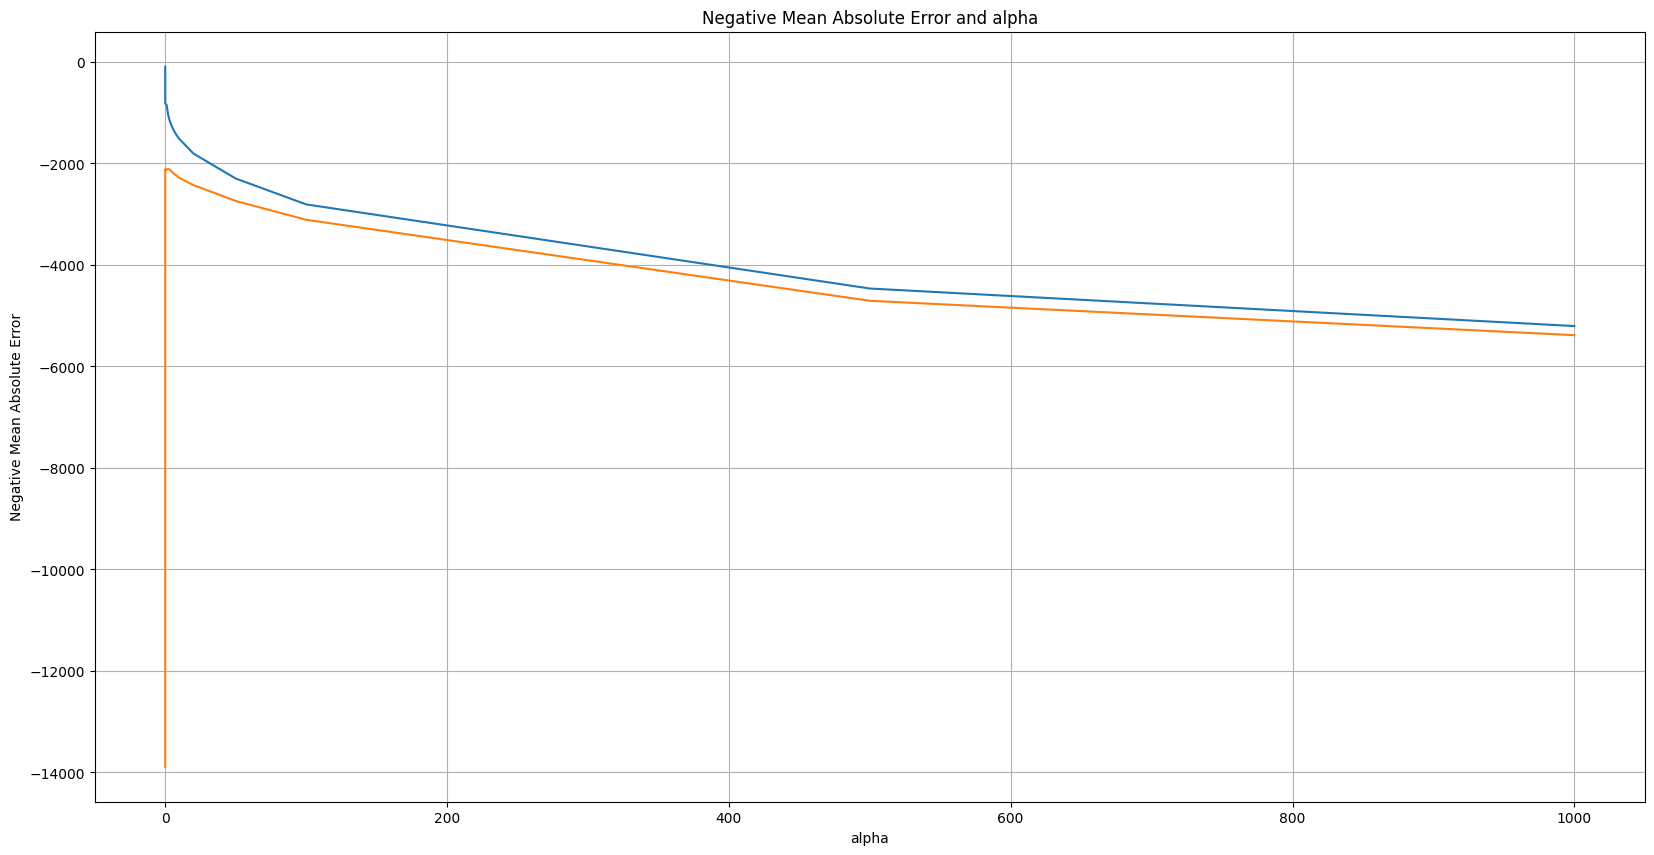

In [113]:
#Plotting the data
# plotting mean test and train scoes with alpha
cv_results['param_alpha'] = cv_results['param_alpha'].astype('int')

# plotting
plt.figure(figsize=(20,10))
plt.plot(cv_results['param_alpha'], cv_results['mean_train_score'])
plt.plot(cv_results['param_alpha'], cv_results['mean_test_score'])
plt.grid()
plt.xlabel('alpha')
plt.ylabel('Negative Mean Absolute Error')
plt.title("Negative Mean Absolute Error and alpha")

In [114]:
cv_results = cv_results[cv_results['param_alpha']<=200]


<ipython-input-115-202cea522ebf>:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  cv_results['param_alpha'] = cv_results['param_alpha'].astype('int')


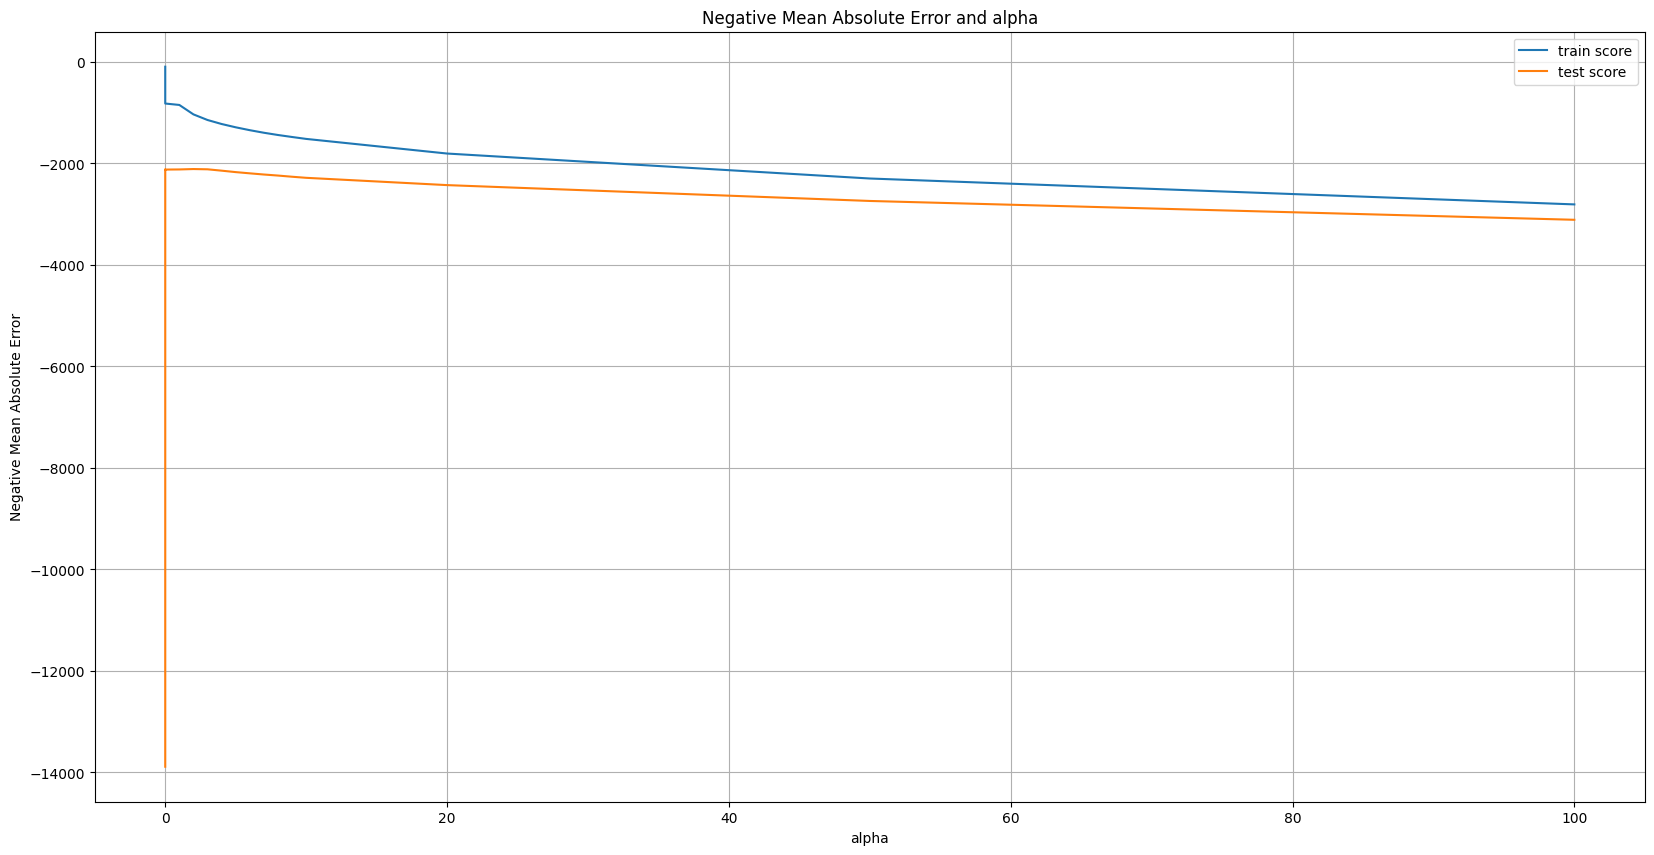

In [115]:
cv_results['param_alpha'] = cv_results['param_alpha'].astype('int')

# plotting
plt.figure(figsize=(20,10))
plt.plot(cv_results['param_alpha'], cv_results['mean_train_score'])
plt.plot(cv_results['param_alpha'], cv_results['mean_test_score'])
plt.grid()
plt.xlabel('alpha')
plt.ylabel('Negative Mean Absolute Error')
plt.title("Negative Mean Absolute Error and alpha")
plt.legend(['train score', 'test score'], loc='upper right')
plt.show()

In [116]:
alpha = 15
ridge = Ridge(alpha=alpha)

ridge.fit(X_train, Y_train)

Ridge(alpha=15)

In [117]:
ridge.coef_

array([  639.79171116,   617.62189311,    46.80829095,  1571.44596805,
         -42.47313199,  1265.10788776,  1842.6023624 ,  -192.38708863,
        -164.58964292,   450.5653764 ,  1437.47204192,  -158.43875784,
         -44.51141297,  -287.92753525,    76.20989187,   -76.20989187,
          73.45963309,   -73.45963309,   -42.52520895,    42.52520895,
         385.42152704,    56.67417829,  -476.71367917,   105.99460401,
         -71.37663017,   -56.84542797,  -571.92014172,   628.76556969,
           0.        ,     0.        ,   114.54823317,   113.15815516,
        -482.15726793,   556.52739165,  -135.00066046,  -213.11629644,
          46.04044486,   498.5796822 ,   182.91840511, -1293.58507941,
         250.9566872 ,   249.18430616,    65.90555389,    46.04044486,
         107.09880751,  -144.26486474,   -38.49277831,    76.20989187,
           0.        ,   176.55129335,  -177.10234967,     0.        ,
        -476.17538761,   -70.26910692,   135.27413524,   940.03067328,
      

In [118]:
imp_ridge = pd.DataFrame({
    "Varname": X_train.columns,
    "Coefficient": ridge.coef_})
imp_ridge.sort_values(by="Coefficient", ascending=False)

,Varname,Coefficient
6,enginesize,1842.602362
3,carwidth,1571.445968
10,horsepower,1437.472042
5,curbweight,1265.107888
55,car_company_bmw,940.030673
...,...,...
32,enginetype_l,-482.157268
72,car_company_toyota,-486.922389
26,drivewheel_fwd,-571.920142
65,car_company_peugeot,-731.341574


In [119]:
imp_ridge.head(100)

,Varname,Coefficient
0,symboling,639.791711
1,wheelbase,617.621893
2,carlength,46.808291
3,carwidth,1571.445968
4,carheight,-42.473132
...,...,...
70,car_company_saab,75.983877
71,car_company_subaru,-135.000660
72,car_company_toyota,-486.922389
73,car_company_volkswagen,-99.407151


In [139]:
zero_indexes = imp_ridge[imp_ridge['Coefficient'].values == 0].index
zero_indexes

Int64Index([28, 29, 48, 51, 60, 63, 67], dtype='int64')

In [141]:
imp_ridge=imp_ridge.drop(zero_indexes)

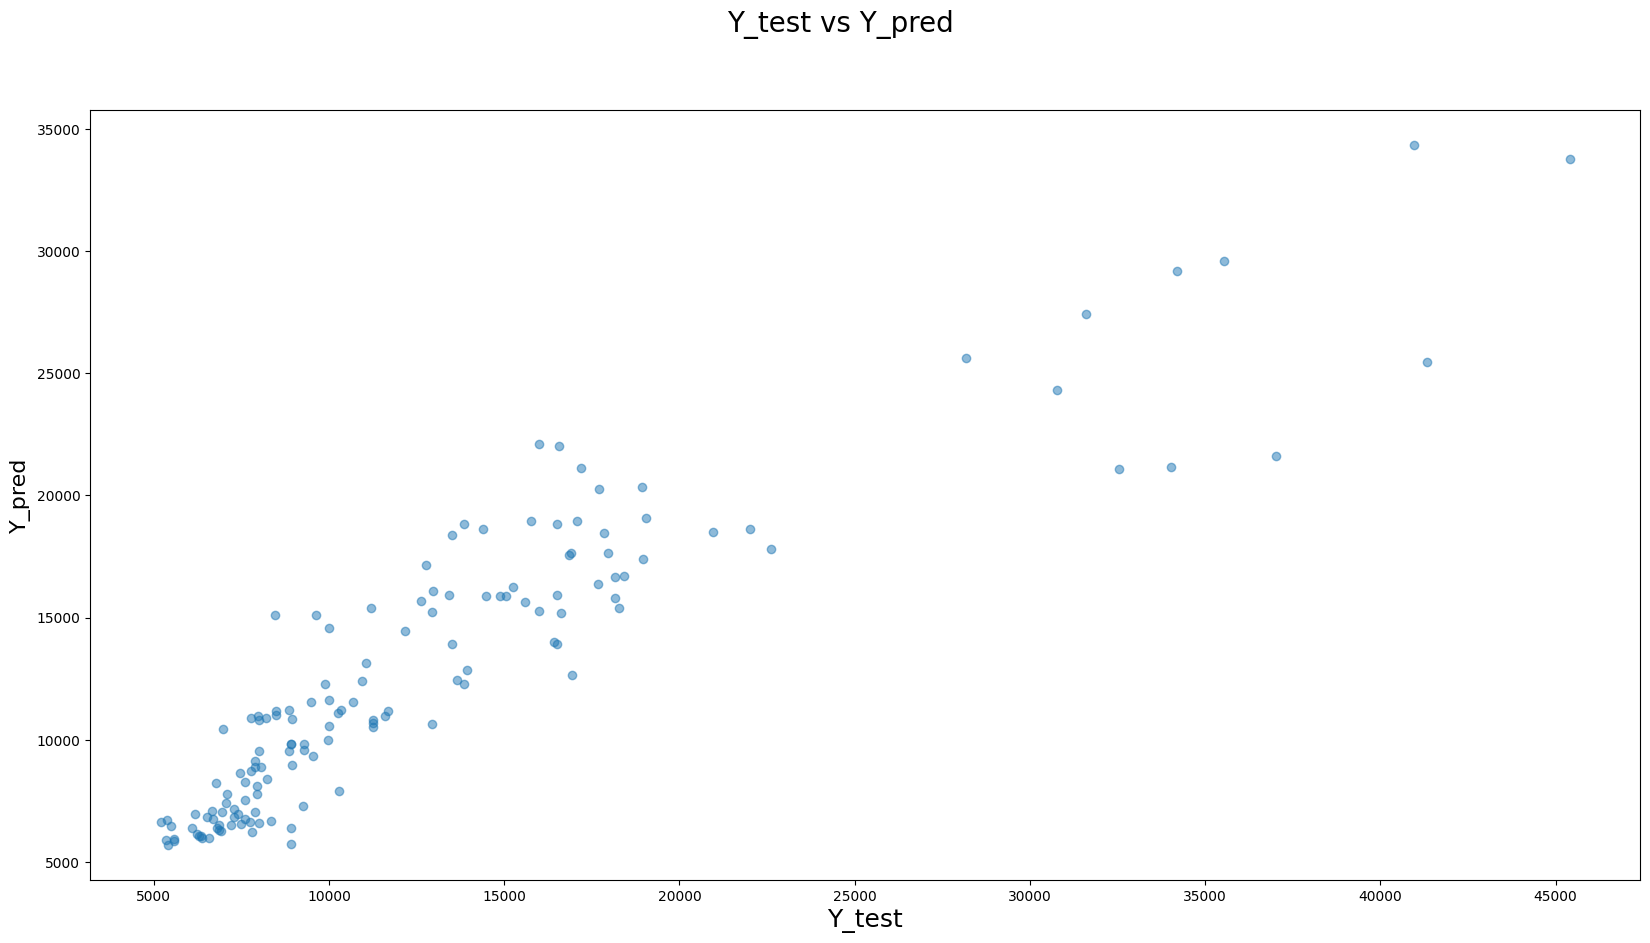

In [143]:
#Prediction and plotting the result
Y_pred = ridge.predict(X_test)
fig = plt.figure(figsize=(20,10))
plt.scatter(Y_test, Y_pred, alpha=.5)
fig.suptitle('Y_test vs Y_pred', fontsize = 20)              # Plot heading
plt.xlabel('Y_test', fontsize = 18)                          # X-label
plt.ylabel('Y_pred', fontsize = 16)
plt.show()

In [144]:
df= pd.DataFrame({'Actual':Y_test,'Predictions':Y_pred})
df['Predictions']= round(df['Predictions'],2)
df.head()


,Actual,Predictions
160,7738.0,6630.05
186,8495.0,11015.22
59,8845.0,11198.71
165,9298.0,9824.84
140,7603.0,8261.24


In [146]:
from sklearn import metrics
metrics.explained_variance_score(Y_test,Y_pred)

0.8088032549965807

In [148]:
metrics.r2_score(Y_test,Y_pred)

0.8084524789634527